### [예제 15] DataGeneration class 를 이용한 Diabetes 구현
#### overfitting 추세 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# 수치미분 함수

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

#### Diabetes class 구현

In [3]:
# Diabetes Class

class Diabetes:
    
    # 생성자
    # xdata, tdata => numpy.array(...)
    def __init__(self, name, input_nodes, hidden1_nodes, output_nodes, learning_rate):
        
        self.name = name
        
        # 2층 hidden layer unit 
        # 가중치 W, 바이어스 b 초기화
        self.W2 = np.random.rand(input_nodes, hidden1_nodes)  
        self.b2 = np.random.rand(hidden1_nodes)
        
        # 3층 hidden layer unit  
        self.W3 = np.random.rand(hidden1_nodes, output_nodes)
        self.b3 = np.random.rand(output_nodes)
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
        print(self.name, " is created !!!")
        
    # 손실함수
    def feed_forward(self):
        
        delta = 1e-7    # log 무한대 발산 방지
    
        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
    
        # cross-entropy 
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
    
    # 손실 값 계산
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
    
        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
            
        # cross-entropy 
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
    
    # query, 즉 미래 값 예측 함수
    def predict(self, input_data):    
        
        z2 = np.dot(input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        if y >= 0.5:
            result = 1  # True
        else:
            result = 0  # False
    
        return y, result
    
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        for index in range(len(input_data)):
            
            (real_val, logical_val) = self.predict(input_data[index])
            
            if logical_val == target_data[index]:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
                
        accuracy_val = len(matched_list) / len(input_data)
                
        return accuracy_val
        
        
    # 수치미분을 이용하여 손실함수가 최소가 될때 까지 학습하는 함수
    def train(self, input_data, target_data):
        
        self.input_data = input_data
        self.target_data = target_data
        
        f = lambda x : self.feed_forward()
        
        self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
    
        self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)
        
        self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)
    
        self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)

#### DataGeneration class 구현

In [4]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, name, file_path, seperation_rate, target_position=-1):
        
        self.name = name
        
        self.file_path = file_path
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def __display_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        unique_target = []
    
        for index in range(len(unique)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
        
            unique_target.append(unique[index])

        for index in range(len(unique_target)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100 * counts[index] / (target_data.shape[0]), 2), ' %')
    
        print('=======================================================================================================')
        
        
    # numpy.random.shuffle()  이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
            
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.__display_target_distribution(loaded_data, 'original data')
        
        
        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        # numpy.random.shuffle 을 이용하여 랜덤하게 데이터 섞기
        np.random.shuffle(loaded_data)
        
        # test_data 는 0 : test_data_num
        
        
        test_data = loaded_data[ 0:test_data_num ]

        # training_data 는 test_data_num 부터 끝까지 
        training_data = loaded_data[ test_data_num: ]

        # display target distribution of generated data 
        
        self.__display_target_distribution(training_data, 'training data')
        
        self.__display_target_distribution(test_data, 'test data')
        
        return training_data, test_data

### (분리비율 0.4)  DataGeneration 객체를 통한 training_data , test_data, validation_data  생성 

In [5]:
# DataGeneration 객체 생성.
test_seperation_rate = 0.4 # 테스트 데이터 분리비율

try:

    data_obj = DataGeneration('Diabetes', './Diabetes.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration]  loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  159
[DataGeneration] unique number of training data =  1.0 , count =  297
[DataGeneration] unique number of training data =  0.0 , ratio =  34.87  %
[DataGeneration] unique number of training data =  1.0 , ratio =  65.13  %
[DataGeneration] unique number of test data =  0.0 , count =  104
[DataGeneration] unique number of test data =  1.0 , count =  199
[DataGeneration] unique number of test data =  0.0 , ratio =  34.32  %
[DataGeneration] unique number of test data =  1.0 , ratio =  65.68  %
training data.shape =  (456, 9)
test data.shape =  (303, 9)


#### Diabetes 객체 생성 및 학습

In [6]:
#hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 20  # hidden 1 nodes 개수. 
o_nodes = 1    # output nodes 개수
lr = 1e-2      # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 20   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list
accuracy_val_list = []    # training data accuracy val
validation_accuracy_val_list = []    # validation data loss val


# Diabetes 객체 생성
obj1 = Diabetes("Diabetes", i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()
    
    loss_val_list.append(cur_loss_val)
    
    training_accuracy = obj1.accuracy(training_data[:, 0:-1], training_data[:, -1])
    
    validation_accuracy = obj1.accuracy(test_data[:, 0:-1], test_data[:, -1])
    
    print('====================================================================')
    print("step = ", step, "            current loss value = ", cur_loss_val, '\n')
    print("step = ", step, "[training data] accuracy value = ", np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)
    
    print("step = ", step, "[validation data] accuracy value = ", np.round(100*validation_accuracy,4), ' %')
    
    validation_accuracy_val_list.append(validation_accuracy)

print('====================================================================')

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0             current loss value =  0.44543733040989353 

step =  0 [training data] accuracy value =  65.1316  %
step =  0 [validation data] accuracy value =  65.6766  %
step =  1             current loss value =  0.45960754244903035 

step =  1 [training data] accuracy value =  65.1316  %
step =  1 [validation data] accuracy value =  65.6766  %
step =  2             current loss value =  0.4367690980822347 

step =  2 [training data] accuracy value =  65.1316  %
step =  2 [validation data] accuracy value =  65.6766  %
step =  3             current loss value =  0.4151428057495228 

step =  3 [training data] accuracy value =  65.1316  %
step =  3 [validation data] accuracy value =  65.6766  %
step =  4             current loss value =  0.39501961438057287 

step =  4 [training data] accuracy value =  66.2281  %
step =  4 [validation data] accuracy value =  66.3366  %
step =  5             current los

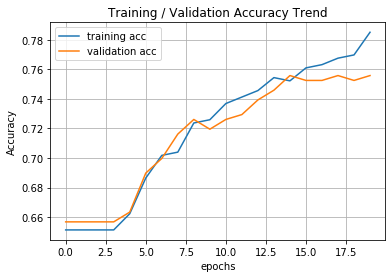

In [7]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

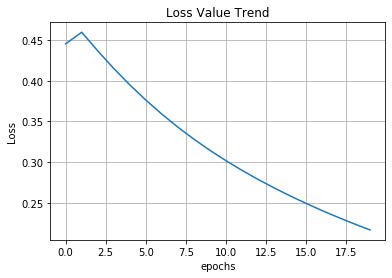

In [8]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

In [9]:
test_input_data = test_data[ :, 0:-1 ]
test_target_data = test_data[ :, -1 ]

accuracy_ret = obj1.accuracy(test_input_data, test_target_data) 

print('Test Data Accuracy = ', round(accuracy_ret, 3))

Test Data Accuracy =  0.756


### (분리비율 0.3)  DataGeneration 객체를 통한 training_data , test_data, validation_data  생성 

In [10]:
# DataGeneration 객체 생성.
test_seperation_rate = 0.3 # 테스트 데이터 분리비율

try:

    data_obj = DataGeneration('Diabetes', './Diabetes.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration]  loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  188
[DataGeneration] unique number of training data =  1.0 , count =  344
[DataGeneration] unique number of training data =  0.0 , ratio =  35.34  %
[DataGeneration] unique number of training data =  1.0 , ratio =  64.66  %
[DataGeneration] unique number of test data =  0.0 , count =  75
[DataGeneration] unique number of test data =  1.0 , count =  152
[DataGeneration] unique number of test data =  0.0 , ratio =  33.04  %
[DataGeneration] unique number of test data =  1.0 , ratio =  66.96  %
training data.shape =  (532, 9)
test data.shape =  (227, 9)


In [11]:
#hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 20  # hidden 1 nodes 개수. 
o_nodes = 1    # output nodes 개수
lr = 1e-2      # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 20   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list
accuracy_val_list = []    # training data accuracy val
validation_accuracy_val_list = []    # validation data loss val


# Diabetes 객체 생성
obj1 = Diabetes("Diabetes", i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()
    
    loss_val_list.append(cur_loss_val)
    
    training_accuracy = obj1.accuracy(training_data[:, 0:-1], training_data[:, -1])
    
    validation_accuracy = obj1.accuracy(test_data[:, 0:-1], test_data[:, -1])
    
    print('====================================================================')
    print("step = ", step, "            current loss value = ", cur_loss_val, '\n')
    print("step = ", step, "[training data] accuracy value = ", np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)
    
    print("step = ", step, "[validation data] accuracy value = ", np.round(100*validation_accuracy,4), ' %')
    
    validation_accuracy_val_list.append(validation_accuracy)

print('====================================================================')

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0             current loss value =  0.6575181359479026 

step =  0 [training data] accuracy value =  60.5263  %
step =  0 [validation data] accuracy value =  63.4361  %
step =  1             current loss value =  0.5903247960638429 

step =  1 [training data] accuracy value =  64.6617  %
step =  1 [validation data] accuracy value =  66.9604  %
step =  2             current loss value =  0.5275180192183271 

step =  2 [training data] accuracy value =  64.6617  %
step =  2 [validation data] accuracy value =  66.9604  %
step =  3             current loss value =  0.47595112986414057 

step =  3 [training data] accuracy value =  68.4211  %
step =  3 [validation data] accuracy value =  68.2819  %
step =  4             current loss value =  0.43323844298270026 

step =  4 [training data] accuracy value =  70.3008  %
step =  4 [validation data] accuracy value =  71.3656  %
step =  5             current loss

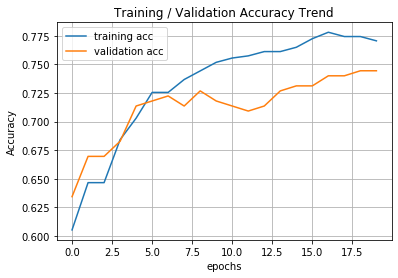

In [12]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

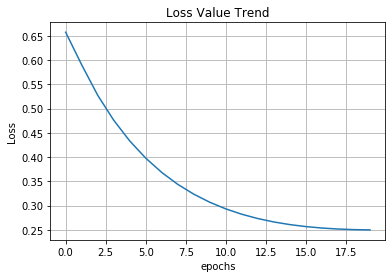

In [13]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

### (분리비율 0.5) DataGeneration 객체를 통한 training_data , test_data, validation_data  생성 

In [14]:
# DataGeneration 객체 생성.
test_seperation_rate = 0.5 # 테스트 데이터 분리비율

try:

    data_obj = DataGeneration('Diabetes', './Diabetes.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration]  loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  146
[DataGeneration] unique number of training data =  1.0 , count =  234
[DataGeneration] unique number of training data =  0.0 , ratio =  38.42  %
[DataGeneration] unique number of training data =  1.0 , ratio =  61.58  %
[DataGeneration] unique number of test data =  0.0 , count =  117
[DataGeneration] unique number of test data =  1.0 , count =  262
[DataGeneration] unique number of test data =  0.0 , ratio =  30.87  %
[DataGeneration] unique number of test data =  1.0 , ratio =  69.13  %
training data.shape =  (380, 9)
test data.shape =  (379, 9)


In [15]:
#hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 20  # hidden 1 nodes 개수. 
o_nodes = 1    # output nodes 개수
lr = 1e-2      # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 20   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list
accuracy_val_list = []    # training data accuracy val
validation_accuracy_val_list = []    # validation data loss val


# Diabetes 객체 생성
obj1 = Diabetes("Diabetes", i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()
    
    loss_val_list.append(cur_loss_val)
    
    training_accuracy = obj1.accuracy(training_data[:, 0:-1], training_data[:, -1])
    
    validation_accuracy = obj1.accuracy(test_data[:, 0:-1], test_data[:, -1])
    
    print('====================================================================')
    print("step = ", step, "            current loss value = ", cur_loss_val, '\n')
    print("step = ", step, "[training data] accuracy value = ", np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)
    
    print("step = ", step, "[validation data] accuracy value = ", np.round(100*validation_accuracy,4), ' %')
    
    validation_accuracy_val_list.append(validation_accuracy)

print('====================================================================')

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0             current loss value =  0.62896290599319 

step =  0 [training data] accuracy value =  58.9474  %
step =  0 [validation data] accuracy value =  67.2823  %
step =  1             current loss value =  0.6013067516648595 

step =  1 [training data] accuracy value =  61.5789  %
step =  1 [validation data] accuracy value =  69.1293  %
step =  2             current loss value =  0.542789846322822 

step =  2 [training data] accuracy value =  62.1053  %
step =  2 [validation data] accuracy value =  69.1293  %
step =  3             current loss value =  0.4920268057513874 

step =  3 [training data] accuracy value =  66.5789  %
step =  3 [validation data] accuracy value =  71.7678  %
step =  4             current loss value =  0.44830023522173906 

step =  4 [training data] accuracy value =  70.2632  %
step =  4 [validation data] accuracy value =  73.0871  %
step =  5             current loss val

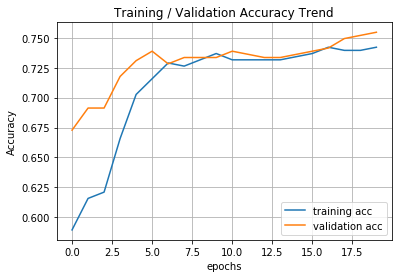

In [16]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

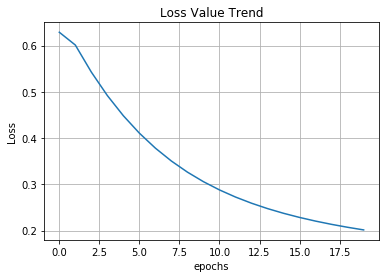

In [17]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

### (분리비율 0.2) DataGeneration 객체를 통한 training_data , test_data, validation_data  생성 

In [19]:
# DataGeneration 객체 생성.
test_seperation_rate = 0.2 # 테스트 데이터 분리비율

try:

    data_obj = DataGeneration('Diabetes', './Diabetes.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration]  loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  203
[DataGeneration] unique number of training data =  1.0 , count =  405
[DataGeneration] unique number of training data =  0.0 , ratio =  33.39  %
[DataGeneration] unique number of training data =  1.0 , ratio =  66.61  %
[DataGeneration] unique number of test data =  0.0 , count =  60
[DataGeneration] unique number of test data =  1.0 , count =  91
[DataGeneration] unique number of test data =  0.0 , ratio =  39.74  %
[DataGeneration] unique number of test data =  1.0 , ratio =  60.26  %
training data.shape =  (608, 9)
test data.shape =  (151, 9)


In [20]:
#hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 20  # hidden 1 nodes 개수. 
o_nodes = 1    # output nodes 개수
lr = 1e-2      # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 20   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list
accuracy_val_list = []    # training data accuracy val
validation_accuracy_val_list = []    # validation data loss val


# Diabetes 객체 생성
obj1 = Diabetes("Diabetes", i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()
    
    loss_val_list.append(cur_loss_val)
    
    training_accuracy = obj1.accuracy(training_data[:, 0:-1], training_data[:, -1])
    
    validation_accuracy = obj1.accuracy(test_data[:, 0:-1], test_data[:, -1])
    
    print('====================================================================')
    print("step = ", step, "            current loss value = ", cur_loss_val, '\n')
    print("step = ", step, "[training data] accuracy value = ", np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)
    
    print("step = ", step, "[validation data] accuracy value = ", np.round(100*validation_accuracy,4), ' %')
    
    validation_accuracy_val_list.append(validation_accuracy)

print('====================================================================')

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0             current loss value =  0.5000520717151856 

step =  0 [training data] accuracy value =  66.6118  %
step =  0 [validation data] accuracy value =  60.2649  %
step =  1             current loss value =  0.40578475360881466 

step =  1 [training data] accuracy value =  66.6118  %
step =  1 [validation data] accuracy value =  60.2649  %
step =  2             current loss value =  0.33424601807004756 

step =  2 [training data] accuracy value =  66.6118  %
step =  2 [validation data] accuracy value =  60.2649  %
step =  3             current loss value =  0.28123683233254615 

step =  3 [training data] accuracy value =  66.6118  %
step =  3 [validation data] accuracy value =  60.2649  %
step =  4             current loss value =  0.24116683211152368 

step =  4 [training data] accuracy value =  67.1053  %
step =  4 [validation data] accuracy value =  60.2649  %
step =  5             current lo

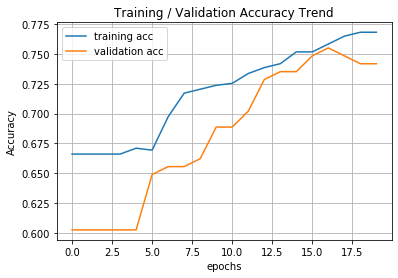

In [21]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

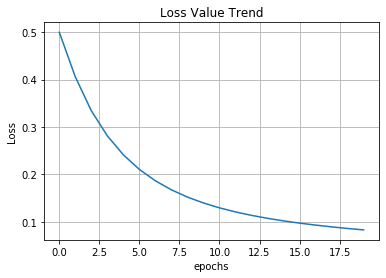

In [22]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

### (분리비율 0.8) DataGeneration 객체를 통한 training_data , test_data, validation_data  생성 

In [23]:
# DataGeneration 객체 생성.
test_seperation_rate = 0.8 # 테스트 데이터 분리비율

try:

    data_obj = DataGeneration('Diabetes', './Diabetes.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration]  loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  47
[DataGeneration] unique number of training data =  1.0 , count =  105
[DataGeneration] unique number of training data =  0.0 , ratio =  30.92  %
[DataGeneration] unique number of training data =  1.0 , ratio =  69.08  %
[DataGeneration] unique number of test data =  0.0 , count =  216
[DataGeneration] unique number of test data =  1.0 , count =  391
[DataGeneration] unique number of test data =  0.0 , ratio =  35.58  %
[DataGeneration] unique number of test data =  1.0 , ratio =  64.42  %
training data.shape =  (152, 9)
test data.shape =  (607, 9)


In [24]:
#hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 20  # hidden 1 nodes 개수. 
o_nodes = 1    # output nodes 개수
lr = 1e-2      # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 20   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list
accuracy_val_list = []    # training data accuracy val
validation_accuracy_val_list = []    # validation data loss val


# Diabetes 객체 생성
obj1 = Diabetes("Diabetes", i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()
    
    loss_val_list.append(cur_loss_val)
    
    training_accuracy = obj1.accuracy(training_data[:, 0:-1], training_data[:, -1])
    
    validation_accuracy = obj1.accuracy(test_data[:, 0:-1], test_data[:, -1])
    
    print('====================================================================')
    print("step = ", step, "            current loss value = ", cur_loss_val, '\n')
    print("step = ", step, "[training data] accuracy value = ", np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)
    
    print("step = ", step, "[validation data] accuracy value = ", np.round(100*validation_accuracy,4), ' %')
    
    validation_accuracy_val_list.append(validation_accuracy)

print('====================================================================')

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0             current loss value =  0.16568726840124892 

step =  0 [training data] accuracy value =  69.0789  %
step =  0 [validation data] accuracy value =  64.4152  %
step =  1             current loss value =  0.3308868420132869 

step =  1 [training data] accuracy value =  69.0789  %
step =  1 [validation data] accuracy value =  64.4152  %
step =  2             current loss value =  0.3972686761562522 

step =  2 [training data] accuracy value =  69.0789  %
step =  2 [validation data] accuracy value =  64.4152  %
step =  3             current loss value =  0.41289564646990334 

step =  3 [training data] accuracy value =  69.0789  %
step =  3 [validation data] accuracy value =  64.4152  %
step =  4             current loss value =  0.4145695804245865 

step =  4 [training data] accuracy value =  69.0789  %
step =  4 [validation data] accuracy value =  64.4152  %
step =  5             current loss

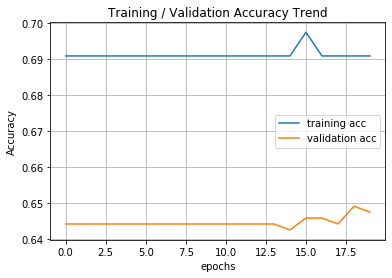

In [25]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

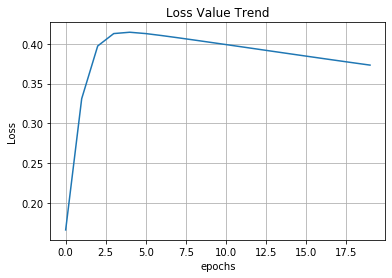

In [26]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

### (분리비율 0.6) DataGeneration 객체를 통한 training_data , test_data, validation_data  생성 

In [27]:
# DataGeneration 객체 생성.
test_seperation_rate = 0.6 # 테스트 데이터 분리비율

try:

    data_obj = DataGeneration('Diabetes', './Diabetes.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration]  loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  110
[DataGeneration] unique number of training data =  1.0 , count =  194
[DataGeneration] unique number of training data =  0.0 , ratio =  36.18  %
[DataGeneration] unique number of training data =  1.0 , ratio =  63.82  %
[DataGeneration] unique number of test data =  0.0 , count =  153
[DataGeneration] unique number of test data =  1.0 , count =  302
[DataGeneration] unique number of test data =  0.0 , ratio =  33.63  %
[DataGeneration] unique number of test data =  1.0 , ratio =  66.37  %
training data.shape =  (304, 9)
test data.shape =  (455, 9)


In [28]:
#hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 20  # hidden 1 nodes 개수. 
o_nodes = 1    # output nodes 개수
lr = 1e-2      # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 20   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list
accuracy_val_list = []    # training data accuracy val
validation_accuracy_val_list = []    # validation data loss val


# Diabetes 객체 생성
obj1 = Diabetes("Diabetes", i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()
    
    loss_val_list.append(cur_loss_val)
    
    training_accuracy = obj1.accuracy(training_data[:, 0:-1], training_data[:, -1])
    
    validation_accuracy = obj1.accuracy(test_data[:, 0:-1], test_data[:, -1])
    
    print('====================================================================')
    print("step = ", step, "            current loss value = ", cur_loss_val, '\n')
    print("step = ", step, "[training data] accuracy value = ", np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)
    
    print("step = ", step, "[validation data] accuracy value = ", np.round(100*validation_accuracy,4), ' %')
    
    validation_accuracy_val_list.append(validation_accuracy)

print('====================================================================')

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0             current loss value =  0.1993800659508514 

step =  0 [training data] accuracy value =  63.8158  %
step =  0 [validation data] accuracy value =  66.3736  %
step =  1             current loss value =  0.38259667488764393 

step =  1 [training data] accuracy value =  63.8158  %
step =  1 [validation data] accuracy value =  66.3736  %
step =  2             current loss value =  0.42236052247723443 

step =  2 [training data] accuracy value =  63.8158  %
step =  2 [validation data] accuracy value =  66.3736  %
step =  3             current loss value =  0.4533633062106344 

step =  3 [training data] accuracy value =  63.8158  %
step =  3 [validation data] accuracy value =  66.3736  %
step =  4             current loss value =  0.48196424988559633 

step =  4 [training data] accuracy value =  63.8158  %
step =  4 [validation data] accuracy value =  66.3736  %
step =  5             current los

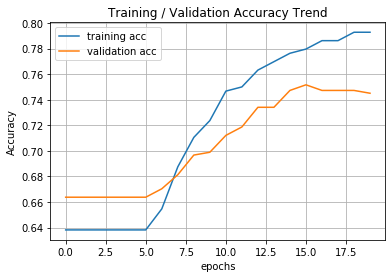

In [29]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

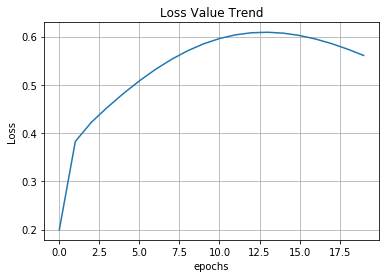

In [30]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

### (분리비율 0.1) DataGeneration 객체를 통한 training_data , test_data, validation_data  생성 

In [31]:
# DataGeneration 객체 생성.
test_seperation_rate = 0.1 # 테스트 데이터 분리비율

try:

    data_obj = DataGeneration('Diabetes', './Diabetes.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration]  loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  234
[DataGeneration] unique number of training data =  1.0 , count =  450
[DataGeneration] unique number of training data =  0.0 , ratio =  34.21  %
[DataGeneration] unique number of training data =  1.0 , ratio =  65.79  %
[DataGeneration] unique number of test data =  0.0 , count =  29
[DataGeneration] unique number of test data =  1.0 , count =  46
[DataGeneration] unique number of test data =  0.0 , ratio =  38.67  %
[DataGeneration] unique number of test data =  1.0 , ratio =  61.33  %
training data.shape =  (684, 9)
test data.shape =  (75, 9)


In [32]:
#hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 20  # hidden 1 nodes 개수. 
o_nodes = 1    # output nodes 개수
lr = 1e-2      # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 20   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list
accuracy_val_list = []    # training data accuracy val
validation_accuracy_val_list = []    # validation data loss val


# Diabetes 객체 생성
obj1 = Diabetes("Diabetes", i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()
    
    loss_val_list.append(cur_loss_val)
    
    training_accuracy = obj1.accuracy(training_data[:, 0:-1], training_data[:, -1])
    
    validation_accuracy = obj1.accuracy(test_data[:, 0:-1], test_data[:, -1])
    
    print('====================================================================')
    print("step = ", step, "            current loss value = ", cur_loss_val, '\n')
    print("step = ", step, "[training data] accuracy value = ", np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)
    
    print("step = ", step, "[validation data] accuracy value = ", np.round(100*validation_accuracy,4), ' %')
    
    validation_accuracy_val_list.append(validation_accuracy)

print('====================================================================')

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0             current loss value =  0.8763493297085233 

step =  0 [training data] accuracy value =  65.7895  %
step =  0 [validation data] accuracy value =  61.3333  %
step =  1             current loss value =  0.8720137788719873 

step =  1 [training data] accuracy value =  65.7895  %
step =  1 [validation data] accuracy value =  61.3333  %
step =  2             current loss value =  0.8686068916886142 

step =  2 [training data] accuracy value =  68.2749  %
step =  2 [validation data] accuracy value =  61.3333  %
step =  3             current loss value =  0.8627245082706579 

step =  3 [training data] accuracy value =  69.883  %
step =  3 [validation data] accuracy value =  65.3333  %
step =  4             current loss value =  0.8533960074244114 

step =  4 [training data] accuracy value =  71.345  %
step =  4 [validation data] accuracy value =  65.3333  %
step =  5             current loss val

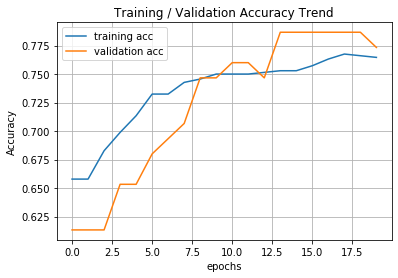

In [33]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

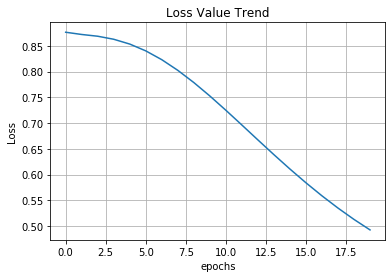

In [34]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

### (분리비율 0.9) DataGeneration 객체를 통한 training_data , test_data, validation_data  생성 

In [35]:
# DataGeneration 객체 생성.
test_seperation_rate = 0.9 # 테스트 데이터 분리비율

try:

    data_obj = DataGeneration('Diabetes', './Diabetes.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration]  loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  25
[DataGeneration] unique number of training data =  1.0 , count =  51
[DataGeneration] unique number of training data =  0.0 , ratio =  32.89  %
[DataGeneration] unique number of training data =  1.0 , ratio =  67.11  %
[DataGeneration] unique number of test data =  0.0 , count =  238
[DataGeneration] unique number of test data =  1.0 , count =  445
[DataGeneration] unique number of test data =  0.0 , ratio =  34.85  %
[DataGeneration] unique number of test data =  1.0 , ratio =  65.15  %
training data.shape =  (76, 9)
test data.shape =  (683, 9)


In [36]:
#hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 20  # hidden 1 nodes 개수. 
o_nodes = 1    # output nodes 개수
lr = 1e-2      # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 20   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list
accuracy_val_list = []    # training data accuracy val
validation_accuracy_val_list = []    # validation data loss val


# Diabetes 객체 생성
obj1 = Diabetes("Diabetes", i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()
    
    loss_val_list.append(cur_loss_val)
    
    training_accuracy = obj1.accuracy(training_data[:, 0:-1], training_data[:, -1])
    
    validation_accuracy = obj1.accuracy(test_data[:, 0:-1], test_data[:, -1])
    
    print('====================================================================')
    print("step = ", step, "            current loss value = ", cur_loss_val, '\n')
    print("step = ", step, "[training data] accuracy value = ", np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)
    
    print("step = ", step, "[validation data] accuracy value = ", np.round(100*validation_accuracy,4), ' %')
    
    validation_accuracy_val_list.append(validation_accuracy)

print('====================================================================')

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0             current loss value =  0.09348825494843492 

step =  0 [training data] accuracy value =  67.1053  %
step =  0 [validation data] accuracy value =  65.1537  %
step =  1             current loss value =  0.20600924901026427 

step =  1 [training data] accuracy value =  67.1053  %
step =  1 [validation data] accuracy value =  65.1537  %
step =  2             current loss value =  0.3537993542149626 

step =  2 [training data] accuracy value =  67.1053  %
step =  2 [validation data] accuracy value =  65.1537  %
step =  3             current loss value =  0.4748681595794942 

step =  3 [training data] accuracy value =  67.1053  %
step =  3 [validation data] accuracy value =  65.1537  %
step =  4             current loss value =  0.5400967225248362 

step =  4 [training data] accuracy value =  67.1053  %
step =  4 [validation data] accuracy value =  65.1537  %
step =  5             current loss

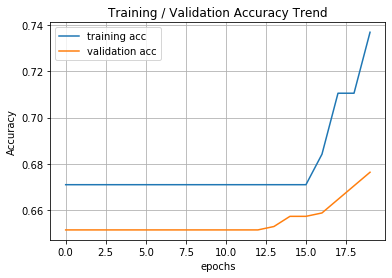

In [37]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

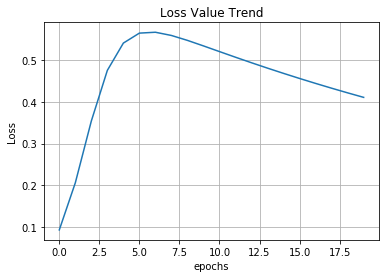

In [38]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()